# Perceptron:

A **Perceptron** can be viewed as a single unit of an artificial neural network simulating the behavior of a single biological neuron.

In a perceptron, the **inputs** $x \in \mathbb{R}^{m}$ are multiplied by the **weights** $w \in \mathbb{R}^m$ in a **dot product** and passed through an **activation function** to produce an output. Sometimes a separate **bias** term $b$ is added, sometimes $w_1 \in \vec{w}$ is multiplied by a factor of $1 \in \vec{x}$ to represent the bias term.  

## Linear Model:
$z = f(w,b) = w^Tx + b$

## Activation Function:
**Unit Step Function**:

Given a threshold $\theta \in \mathbb{R}$, a simple unit step activation function is defined as:

$g(z) = 1$ if $z \geq \theta$, $0$ otherwise. Let $\theta = 0$:

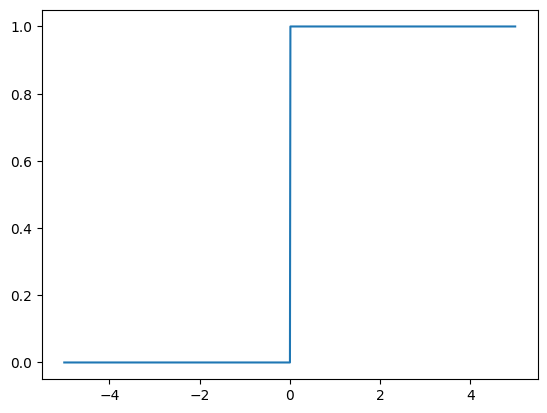

In [5]:
import numpy as np
import matplotlib.pyplot as plt

array = np.arange(-5,5,0.01)

function = [1 if i>= 0 else 0 for i in array]

plt.figure()
plt.plot(array, function)
plt.show()

# Approximation:
The output prediction $\hat{y}$ of the perceptron is given by:

$ \hat{y} = g(f(w,b)) = g(w^Tx + b)$

# Perceptron Update Rule:
To get the needed weights and biases, we use the **perceptron rule**.

For each training sample $x_i$:

$ w = w + \triangle w$, where

$ \triangle w = \alpha \cdot (y_i - \hat{y}_i) \cdot x_i$, where $\alpha \in [0,1]$ is the **learning rate**.

The perceptron isn't trying to minimize a loss function in the traditional sense. Instead, it is attempting to correct misclassifications by adjusting the weights in a way that moves the decision boundary toward the correct class.

## Update Rule:
$\begin{pmatrix} y & \hat{y} & y-\hat{y} \\ 1 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 0 & 0 \\ 0 & 1 & -1 \end{pmatrix}$

Thus, weights are pushed towards positive or negative target class in case of missclassification, i.e. if the actual class is greater than the predicted class, the weights are increased, and conversely, if the predicted class is greater than the actual class, the weights are decreased.


# Implementation:

In [10]:
import numpy as np


class Perceptron:

  def __init__(self, lr: float = 0.01, n_iters = 100):
    self.lr = lr
    self.n_iters = n_iters
    self.activation_func = self._unit_step_activation

    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    # initialize weights
    self.weights = np.zeros(n_features)
    self.bias = 0

    # we also want to ensure y consists of classes 0 or 1:

    y_ = np.array([1 if i>0 else 0 for i in y])

    # we want to look at each training sample for a couple of iterations -> need 2 for loops:

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights) + self.bias
        y_pred = self.activation_func(linear_output)


        update = self.lr * (y_[idx] - y_pred)
        self.weights += update * x_i
        self.bias += update * 1


  def predict(self, X):
    linear_function = np.dot(X,self.weights) + self.bias
    y_pred = self.activation_func(linear_function)
    return y_pred


  # unit step activation function helper method:
  def _unit_step_activation(self, x):
    return np.where(x >= 0, 1, 0)

# Testing:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / float(len(y_true))
  return accuracy


# creating a 2 class dataset:
X,y = datasets.make_blobs(n_samples = 150, n_features =2, centers = 2, cluster_std = 1.05, random_state = 2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

p = Perceptron(lr = 0.01, n_iters = 100)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print(f'Perceptron Classification Accuracy: {accuracy(y_test, predictions)}')

Perceptron Classification Accuracy: 1.0


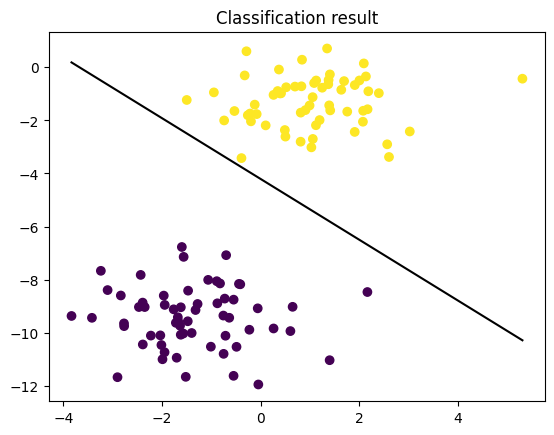

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker ='o', c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

plt.title('Classification result')
ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')
plt.show()

# Linear Separability
The perceptron will work for **linearly separable** functions. However, we can apply other activation functions, e.g. sigmoid, and apply **gradient descent** to optimize model parameters to enable the model to capture non-linear and more complex functions.